## Conll 2002 Data Analisys

Analisis of the dataset..


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def read_words(filename):
    with open(filename, "r") as f:
        words = []
        i = 1
        for line in f:
            data = line.split()
            if len(data) > 0:
                words.append((i, data[0], data[1], data[2]))
            else:
                words.append((i, '<eol>', '', ''))
            i += 1
        return words

def get_phrases(words):
    phrases = []
    phrase = []
    i = 1
    for word in words:
        if word[1] == '<eol>':
            phrases.append((i, phrase))
            phrase = []
            i += 1
        else:
            phrase.append(word)
    return phrases


In [160]:
testa_words = read_words('dataset/conll2002/esp.testa')
testb_words = read_words('dataset/conll2002/esp.testb')
train_words = read_words('dataset/conll2002/esp.train')

testa_phrases = get_phrases(testa_words)
testb_phrases = get_phrases(testb_words)
train_phrases = get_phrases(train_words)

print("testa: {} words, {} phrases".format(len(testa_words), len(testa_phrases)))
print("testb: {} words, {} phrases".format(len(testb_words), len(testb_phrases)))
print("train: {} words, {} phrases".format(len(train_words), len(train_phrases)))

testa: 54838 words, 1915 phrases
testb: 53050 words, 1517 phrases
train: 273038 words, 8323 phrases


In [4]:
testa_words = read_words('dataset/conll2002/ned.testa')
testb_words = read_words('dataset/conll2002/ned.testb')
train_words = read_words('dataset/conll2002/ned.train')

testa_phrases = get_phrases(testa_words)
testb_phrases = get_phrases(testb_words)
train_phrases = get_phrases(train_words)

print("testa: {} words, {} phrases".format(len(testa_words), len(testa_phrases)))
print("testb: {} words, {} phrases".format(len(testb_words), len(testb_phrases)))
print("train: {} words, {} phrases".format(len(train_words), len(train_phrases)))

testa: 40656 words, 2895 phrases
testb: 74189 words, 5195 phrases
train: 218737 words, 15806 phrases


In [45]:
train_phrases[:3]

[(1,
  [(1, 'Melbourne', 'NP', 'B-LOC'),
   (2, '(', 'Fpa', 'O'),
   (3, 'Australia', 'NP', 'B-LOC'),
   (4, ')', 'Fpt', 'O'),
   (5, ',', 'Fc', 'O'),
   (6, '25', 'Z', 'O'),
   (7, 'may', 'NC', 'O'),
   (8, '(', 'Fpa', 'O'),
   (9, 'EFE', 'NC', 'B-ORG'),
   (10, ')', 'Fpt', 'O'),
   (11, '.', 'Fp', 'O')]),
 (2, [(13, '-', 'Fg', 'O')]),
 (3,
  [(15, 'El', 'DA', 'O'),
   (16, 'Abogado', 'NC', 'B-PER'),
   (17, 'General', 'AQ', 'I-PER'),
   (18, 'del', 'SP', 'I-PER'),
   (19, 'Estado', 'NC', 'I-PER'),
   (20, ',', 'Fc', 'O'),
   (21, 'Daryl', 'VMI', 'B-PER'),
   (22, 'Williams', 'NC', 'I-PER'),
   (23, ',', 'Fc', 'O'),
   (24, 'subrayó', 'VMI', 'O'),
   (25, 'hoy', 'RG', 'O'),
   (26, 'la', 'DA', 'O'),
   (27, 'necesidad', 'NC', 'O'),
   (28, 'de', 'SP', 'O'),
   (29, 'tomar', 'VMN', 'O'),
   (30, 'medidas', 'NC', 'O'),
   (31, 'para', 'SP', 'O'),
   (32, 'proteger', 'VMN', 'O'),
   (33, 'al', 'SP', 'O'),
   (34, 'sistema', 'NC', 'O'),
   (35, 'judicial', 'AQ', 'O'),
   (36, 'australiano

In [54]:
train_words[:5]

[(1, 'Melbourne', 'NP', 'B-LOC'),
 (2, '(', 'Fpa', 'O'),
 (3, 'Australia', 'NP', 'B-LOC'),
 (4, ')', 'Fpt', 'O'),
 (5, ',', 'Fc', 'O')]

In [161]:
def clean_words(words):
    for idx, word in enumerate(words):
        if word[1].isnumeric() \
        or word[1].lstrip('-').replace('.', '', 1).isnumeric() \
        or word[1].lstrip('-').replace(',', '', 1).isnumeric():
            words[idx] = (word[0], '<num>', word[2], word[3])

    return words


In [233]:
def build_vocab(words):
    counter = collections.Counter()
    
    for word in words:
        if word[1] == '<eol>':
            counter[word[1]] += 1
        else:
            counter[word[1]] += 1
            counter[word[3]] += 1
    
#     count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))
#     words, _ = list(zip(*count_pairs))
#     word_to_id = dict(zip(words, range(len(words))))

    vocabulary_size = 25000

    vocabulary = [("<unk>", None), ("<pad>", None), ("<go>", None), ("<eos>", None)] + Counter(words).most_common(vocabulary_size - 1)
    vocabulary = np.array([word for word, _ in vocabulary])
    dictionary = {word: code for code, word in enumerate(vocabulary)}
    data = np.array([dictionary.get(word, 0) for word in words])

    return word_to_id, count_pairs


In [234]:
testa_words = clean_words(testa_words)
testb_words = clean_words(testb_words)
train_words = clean_words(train_words)

vocab, vocab_freq = build_vocab(testa_words + testb_words + train_words)
rvocab = dict(zip(vocab.values(), vocab.keys()))

In [235]:
len(vocab)

28985

In [238]:
print(vocab['B-LOC'])
print(rvocab[14])

14
B-LOC


In [8]:
def count_clases(words):
    counter = collections.Counter()
    for word in words:
        if word[1] != '<eol>':
            counter[word[3]] += 1
    
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))
    return count_pairs


In [9]:
count_clases(train_words)

[('O', 231920),
 ('B-ORG', 7390),
 ('I-ORG', 4992),
 ('B-LOC', 4913),
 ('B-PER', 4321),
 ('I-PER', 3903),
 ('I-MISC', 3212),
 ('B-MISC', 2173),
 ('I-LOC', 1891)]

In [118]:
def subcategorybar(X, vals, legend, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.legend(legend)

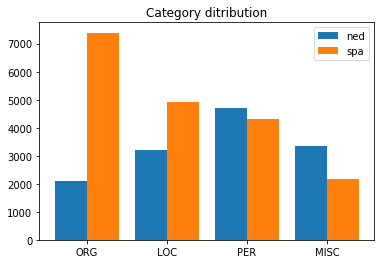

In [119]:
# | file       | ORG   | LOC   | PER   | MISC  |
# | ---------- | ----- | ----- | ----- | ----- |
# | ned.train  | 2082  | 3208  | 4716  | 3336  |
# | spa.train  | 7390  | 4913  | 4321  | 2173  |

ned = [2082, 3208, 4716, 3336]
spa = [7390, 4913, 4321, 2173]
    
plt.figure()
subcategorybar(['ORG', 'LOC', 'PER', 'MISC'], [ned, spa], ['ned', 'spa'])
plt.title('Category ditribution')
plt.show()

## Create Embeddings

In [11]:
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

np.random.seed(42)

In [147]:
words = np.array([word[1] for word in train_words + testa_words + testb_words])

In [159]:
from collections import Counter

vocabulary_size = 25000

vocabulary = [("<unk>", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [160]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels


In [161]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [162]:
batch, [vocabulary[word] for word in batch]

(array([  18,   18, 2012, 2012,   17,   17,    2,    2], dtype=int32),
 ['(', '(', 'Australia', 'Australia', ')', ')', ',', ','])

In [163]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[4386],
        [2012],
        [  17],
        [  18],
        [   2],
        [2012],
        [   9],
        [  17]], dtype=int32),
 ['Melbourne', 'Australia', ')', '(', ',', 'Australia', '<num>', ')'])

### Build the model

In [164]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [165]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [166]:
vocabulary_size = 25000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [167]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [168]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

### Train the model

In [169]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  278.7625427246094
Nearest to a: detuvieron, resistan, Bellen, presenciar, Huwart, madridistas, disputaron, milenaria,
Nearest to millones: UNIDAD, Basti, comprometemos, mediana, elaborar, transcurrir, Isaías, empequeñece,
Nearest to esta: placentino, primeras, desnudaron, Theodore, Aizpuru, fechas, invierno, permanente,
Nearest to como: Albizu, declararse, mentiras, desnutrición, transporte, mejorarán, sequía, palo,
Nearest to o: apostar, SESSM, Hualde, Quiceno, Telecom, días, desempeñar, nubes,
Nearest to :: pianista, asistido, cursado, Robredo, demandan, Rudi, vitícola, discurren,
Nearest to por: Espinosa, otorgara, Móstoles, conociera, redunda, EVEREST, presenciado, ejerció,
Nearest to año: tesis, AMENAZA, Impuesto, Firestone, versiones, arrestado, impuesto, Sierra,
Nearest to Los: época., sociólogo, Comisaría, traumática, NACIONAL, vigencia, cierto, Hisusa,
Nearest to y: Jerez, plagados, García-Loygorri, gigavatios, presentan, leerá, estemos,

In [171]:
np.save("./embeddings/esp_final_embeddings.npy", final_embeddings)

### Plot the embeddings

In [172]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

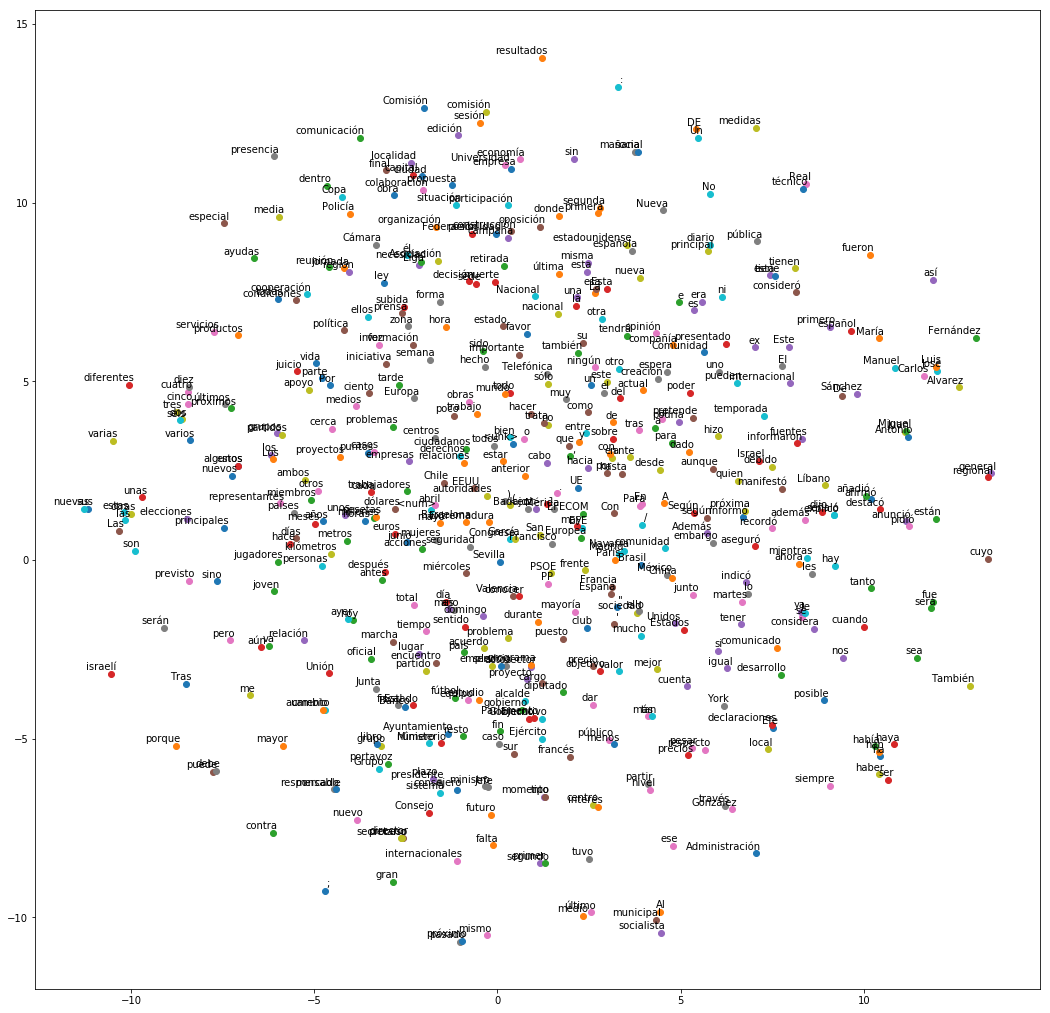

In [173]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## Model implementation

In [248]:
from collections import Counter
import numpy as np
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

np.random.seed(42)

In [249]:
def read_words(filename):
    with open(filename, "r") as f:
        words = []
        i = 1
        for line in f:
            data = line.split()
            if len(data) > 0:
                words.append((i, data[0], data[1], data[2]))
            else:
                words.append((i, '<eol>', '', ''))
            i += 1
        return words

In [277]:
def build_vocab(vocabulary_size, dataset):
    counter = collections.Counter()
    words = []
    
    for item in dataset:
        words.append(item[1])
        if item[1] != '<eol>':
            words.append(item[3])

    vocabulary = [("<unk>", None), ("<pad>", None), ("<go>", None), ("<eol>", None)] + Counter(words).most_common(vocabulary_size - 1)
    vocabulary = np.array([word for word, _ in vocabulary])
    dictionary = {word: code for code, word in enumerate(vocabulary)}
    rdictionary = dict(zip(dictionary.values(), dictionary.keys()))

    return dictionary, rdictionary

In [372]:
def split_sentences(dataset):
    sentences = []
    labels = []
    sentence = []
    label = []
    
    for item in dataset:
        if item[1] == '<eol>':
            sentences.append(np.array(sentence))
            labels.append(np.array(label))
            sentence = []
            label = []
        else:
            sentence.append(word2int.get(item[1], 0))
            label.append(word2int.get(item[3], 0))

    return np.array(sentences), np.array(labels)

In [252]:
def next_batch(sentences, n_steps, batch_size, start_idx):
    words = []
    labels = []

    for sentence in sentences[start_idx : start_idx + batch_size]:
        sentence = ([vocab[word] for word in sentence[0]], [vocab[label] for label in sentence[1]])
        
        if len(sentence[0]) < n_steps:
            sentence = (sentence[0] + [vocab['<pad>'] for _ in range(n_steps - len(sentence[0]))],
                        sentence[1] + [vocab['<pad>'] for _ in range(n_steps - len(sentence[0]))])         
        elif len(sentence[0]) > n_steps:
            sentence = (sentence[0][:n_steps], sentence[1][:n_steps])

        words.append(sentence[0])
        labels.append(sentence[1])   
    
    return words, labels

In [364]:
testa_data = read_words('dataset/conll2002/esp.testa')
testb_data = read_words('dataset/conll2002/esp.testb')
train_data = read_words('dataset/conll2002/esp.train')

In [365]:
vocabulary_size = 20000

word2int, int2word = build_vocab(vocabulary_size, testa_data + testb_data + train_data)

In [373]:
X_train, y_train = split_sentences(train_data)
X_eval, y_eval = split_sentences(testa_data)
X_test, y_test = split_sentences(testb_data)

In [374]:
y_train[0]

array([17,  4, 17,  4,  4,  4,  4,  4,  9,  4,  4])

In [413]:
def shuffle_batch(X, y, batch_size, n_steps):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch = []
        y_batch = []
        
        for item in X[batch_idx]:
            if len(item) < n_steps:
                item = np.concatenate((item, np.repeat(word2int.get('<pad>'), n_steps - len(item))), axis=None)
            elif len(item) > n_steps:
                item = item[:n_steps]
            X_batch.append(item)

        for item in y[batch_idx]:
            if len(item) < n_steps:
                item = np.concatenate((item, np.repeat(word2int.get('<pad>'), n_steps - len(item))), axis=None)
            elif len(item) > n_steps:
                item = item[:n_steps]
            y_batch.append(item)
        
        yield np.stack(X_batch, axis=0), np.stack(y_batch, axis=0)

In [294]:
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 100
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # Clases
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

In [295]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [416]:
for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size, n_steps):
    print(X_batch[0])
    print(y_batch[0])
    break

[ 7704 12660    19    28  7236     5    14  3949    14    22 16345  3648
     5   119     0    16   165    10    14    12  1586   126   907     6
    12 10251    46    98  2531     6    78  1123    39  1677    10    39
  4182 18983    49    10   994    70   147   732    62    14    11     1
     1     1]
[18  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  1
  1  1]


In [406]:
n_epochs = 10
batch_size = 10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size, n_steps):
            #X_batch = X_batch.reshape((-1, batch_size, n_steps))
            sess.run(training_op, feed_dict={X: X_batch, Y: y_batch})
            
        acc_batch = accuracy.eval(feed_dict={X: X_batch, Y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, Y: y_test})
        
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float and shape [?,49,1]
	 [[node Placeholder_2 (defined at <ipython-input-294-bec56189cd03>:13)  = Placeholder[dtype=DT_FLOAT, shape=[?,49,1], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node Adam/beta1/_9}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_42_Adam/beta1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-294-bec56189cd03>", line 13, in <module>
    W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/opt/miniconda3/envs/mlbook/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float and shape [?,49,1]
	 [[node Placeholder_2 (defined at <ipython-input-294-bec56189cd03>:13)  = Placeholder[dtype=DT_FLOAT, shape=[?,49,1], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node Adam/beta1/_9}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_42_Adam/beta1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


## Tensorflow tutorial

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import os
import time
from collections import Counter

In [2]:
def read_words(filename):
    with open(filename, "r") as f:
        words = []
        i = 1
        for line in f:
            data = line.split()
            if len(data) > 0:
                words.append((i, data[0], data[1], data[2]))
            else:
                words.append((i, '<eol>', '', ''))
            i += 1
        return words

In [6]:
def build_vocab(vocabulary_size, dataset):
    counter = Counter()
    words = []
    
    for item in dataset:
        words.append(item[1])
        if item[1] != '<eol>':
            words.append(item[3])

    vocabulary = [("<unk>", None), ("<pad>", None), ("<go>", None), ("<eol>", None)] + Counter(words).most_common(vocabulary_size - 1)
    vocabulary = np.array([word for word, _ in vocabulary])
    dictionary = {word: code for code, word in enumerate(vocabulary)}
    rdictionary = dict(zip(dictionary.values(), dictionary.keys()))

    return dictionary, rdictionary

In [36]:
def split_sentences(dataset):
    sentences = []
    labels = []
    sentence = []
    label = []
    
    for item in dataset:
        if item[1] == '<eol>':
            sentences.append(np.array(sentence))
            labels.append(np.array(label))
            sentence = []
            label = []
        else:
            sentence.append(word2idx.get(item[1], 0))
            label.append(word2idx.get(item[3], 0))

    return sentences, labels

In [37]:
testa_data = read_words('dataset/conll2002/esp.testa')
testb_data = read_words('dataset/conll2002/esp.testb')
train_data = read_words('dataset/conll2002/esp.train')

In [38]:
vocabulary_size = 20000

word2idx, idx2word = build_vocab(vocabulary_size, testa_data + testb_data + train_data)

In [39]:
X_train, y_train = split_sentences(train_data)
X_eval, y_eval = split_sentences(testa_data)
X_test, y_test = split_sentences(testb_data)

In [40]:
int_as_word = [idx2word.get(w, 0) for w in X_train[0]]
print(X_train[0], int_as_word)

[4253   27 2139   26    6  244   45   27   40   26   11] ['Melbourne', '(', 'Australia', ')', ',', '25', 'may', '(', 'EFE', ')', '.']


In [41]:
int_as_label = [idx2word.get(w, 0) for w in y_train[0]]
print(y_train[0], int_as_label)

[17  4 17  4  4  4  4  4  9  4  4] ['B-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O']


In [42]:
X_train.shape, y_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [43]:
# The maximum length sentence we want for a single input in characters
seq_length = 50
examples_per_epoch = len(X_train)//seq_length

# Create training examples / targets
word_dataset = tf.data.Dataset.from_tensors(X_train)

for i in word_dataset.take(5):
    print(idx2word.get(i.numpy(), 0))

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [10]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [11]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [12]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [13]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 18 ('F')
  expected output: 47 ('i')
Step    1
  input: 47 ('i')
  expected output: 56 ('r')
Step    2
  input: 56 ('r')
  expected output: 57 ('s')
Step    3
  input: 57 ('s')
  expected output: 58 ('t')
Step    4
  input: 58 ('t')
  expected output: 1 (' ')


In [14]:
# Batch size 
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch//BATCH_SIZE

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences, 
# so it doesn't attempt to shuffle the entire sequence in memory. Instead, 
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [15]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension 
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [16]:
if tf.test.is_gpu_available():
    rnn = tf.keras.layers.CuDNNGRU
else:
    import functools
    rnn = functools.partial(
        tf.keras.layers.GRU, recurrent_activation='sigmoid')

In [17]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                batch_input_shape=[batch_size, None]),
      rnn(rnn_units,
          return_sequences=True, 
          recurrent_initializer='glorot_uniform',
          stateful=True),
      tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [18]:
model = build_model(
    vocab_size = len(vocab), 
    embedding_dim=embedding_dim, 
    rnn_units=rnn_units, 
    batch_size=BATCH_SIZE)

In [19]:
for input_example_batch, target_example_batch in dataset.take(1): 
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [24]:
sampled_indices = tf.random.multinomial(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [25]:
sampled_indices

array([30,  3, 25, 55, 62,  4,  2, 41, 15, 31, 40,  8, 20, 44, 14, 37, 18,
        0, 39, 23, 34, 22,  5,  3, 38, 46, 31, 43, 37,  4, 33, 57, 49, 35,
       55, 20, 33, 22, 11, 17, 33, 10,  9, 12, 17, 59,  6, 16, 54, 10, 51,
       43, 42, 26, 56, 61, 41, 22, 38, 43, 44, 24, 15, 50, 23, 45, 18, 44,
       50, 17, 38, 18, 16, 22, 51, 32, 11, 42, 51, 28, 39, 38, 59, 13,  6,
        6, 57, 18, 59, 16, 54, 59, 15, 24, 15, 18,  1, 61, 18, 20])

In [26]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 "ce.\nWhat! look upon my brother: both your pardons,\nThat e'er I put between your holy looks\nMy ill su"

Next Char Predictions: 
 "R$Mqx&!cCSb.HfBYF\naKVJ'$ZhSeY&UskWqHUJ;EU:3?Eu,Dp:medNrwcJZefLClKgFflEZFDJmT;dmPaZuA,,sFuDpuCLCF wFH"


In [28]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       9.353337


In [29]:
model.compile(
    optimizer = tf.train.AdamOptimizer(),
    loss = loss)

In [30]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [31]:
EPOCHS=3

In [32]:
history = model.fit(dataset.repeat(), epochs=EPOCHS, steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_callback])

Epoch 1/3
174/174 [==============================] - 18s 106ms/step - loss: 3.0614
Epoch 2/3
174/174 [==============================] - 17s 99ms/step - loss: 2.7716
Epoch 3/3
174/174 [==============================] - 17s 99ms/step - loss: 2.7259


In [43]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_4'

In [44]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
cu_dnngru_3 (CuDNNGRU)       (1, None, 1024)           3938304   
_________________________________________________________________
dense_3 (Dense)              (1, None, 65)             66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [46]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing) 
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a multinomial distribution to predict the word returned by the model
      predictions = predictions / temperature
      predicted_id = tf.multinomial(predictions, num_samples=1)[-1,0].numpy()
      
      # We pass the predicted word as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)
      
      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [47]:
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: Sighions, Camillo; father, be ready: and let me
be deposed; of many move mes whose sequitus Duke of his!

QUEEN ELIZABETH:
Every brother Richard I can nimble love therre.

Second Gentleman:
But Menenius me for merry cheer fasty,
And let you be concluasight. But, must here.

SICINIUS:
You know one,
That's your highness King Richard oath
And solemn hand, fled, did the ch QUSHERS:
Condemn'd and dream out prove her. a part there, made me:
O, more worms in dispostesure.
The previte and seven a kild bowness that dead:
Thy father is efter to die: let us banish
Which IF God take revenge! I lie, take your sweet son:
I'll fright foung first thou wast two uncles;
Therefore for hand scand under after Angelo.
We shallow, discost too; let me see his royal their will.

DUKE VINCENTIO:
Nay, bawd! maliciold her uncle: lest me no'e!
The ot-will cug off abour there I leave.

KING RICHARD II:
You all and in ghost speed; the princes madam:
I am now, even what that where this shouldast lost controlie

In [38]:
model = build_model(
  vocab_size = len(vocab), 
  embedding_dim=embedding_dim, 
  rnn_units=rnn_units, 
  batch_size=BATCH_SIZE)

In [39]:
optimizer = tf.train.AdamOptimizer()

In [42]:
# Training step
EPOCHS = 5

for epoch in range(EPOCHS):
    start = time.time()
    
    # initializing the hidden state at the start of every epoch
    # initally hidden is None
    hidden = model.reset_states()
    
    for (batch_n, (inp, target)) in enumerate(dataset):
          with tf.GradientTape() as tape:
              # feeding the hidden state back into the model
              # This is the interesting step
              predictions = model(inp)
              loss = tf.losses.sparse_softmax_cross_entropy(target, predictions)
              
          grads = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(grads, model.trainable_variables))

          if batch_n % 100 == 0:
              template = 'Epoch {} Batch {} Loss {:.4f}'
              print(template.format(epoch+1, batch_n, loss))

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
      model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print ('Epoch {} Loss {:.4f}'.format(epoch+1, loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 1.4470
Epoch 1 Batch 100 Loss 1.4373
Epoch 1 Loss 1.3987
Time taken for 1 epoch 16.191888570785522 sec

Epoch 2 Batch 0 Loss 1.3759
Epoch 2 Batch 100 Loss 1.4008
Epoch 2 Loss 1.3833
Time taken for 1 epoch 15.99270224571228 sec

Epoch 3 Batch 0 Loss 1.3208
Epoch 3 Batch 100 Loss 1.3806
Epoch 3 Loss 1.3618
Time taken for 1 epoch 16.028817415237427 sec

Epoch 4 Batch 0 Loss 1.2681
Epoch 4 Batch 100 Loss 1.3156
Epoch 4 Loss 1.3443
Time taken for 1 epoch 16.01452398300171 sec

Epoch 5 Batch 0 Loss 1.2154
Epoch 5 Batch 100 Loss 1.3028
Epoch 5 Loss 1.2635
Time taken for 1 epoch 15.973961353302002 sec

